In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


print("=" * 60)
print("PART A: MANUAL CALCULATIONS")
print("=" * 60)


print("\n1. Sample Dataset:")
print("   Features: [Age, Income]")
print("   Target: Buy")

data = [
    [0, 0, 0],
    [0, 0, 0],
    [1, 0, 0],
    [2, 0, 0],
    [2, 1, 1],
    [2, 1, 1],
    [1, 1, 1],
    [0, 1, 0],
    [2, 0, 1],
    [0, 1, 1]
]


df = pd.DataFrame(data, columns=['Age', 'Income', 'Buy'])

print("\nData:")
print(df.to_string(index=False))


PART A: MANUAL CALCULATIONS

1. Sample Dataset:
   Features: [Age, Income]
   Target: Buy

Data:
 Age  Income  Buy
   0       0    0
   0       0    0
   1       0    0
   2       0    0
   2       1    1
   2       1    1
   1       1    1
   0       1    0
   2       0    1
   0       1    1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
print("\n2. Gini Impurity Calculation:")
print("   Formula: Gini = 1 - Σ(p_i^2)")

# Extract target values
labels = df['Buy'].values

# Total samples
n_total = len(labels)

# Count Yes (1) and No (0)
n_yes = np.sum(labels == 1)
n_no = np.sum(labels == 0)

# Probabilities
p_yes = n_yes / n_total
p_no = n_no / n_total

# Gini Impurity calculation
gini = 1 - (p_yes**2 + p_no**2)

# Display results
print(f"   Total samples = {n_total}")
print(f"   Yes = {n_yes}, No = {n_no}")
print(f"   P(Yes) = {p_yes:.2f}")
print(f"   P(No) = {p_no:.2f}")
print(f"   Gini = 1 - ({p_yes:.2f}² + {p_no:.2f}²)")
print(f"   Gini Impurity = {gini:.4f}")



2. Gini Impurity Calculation:
   Formula: Gini = 1 - Σ(p_i^2)
   Total samples = 10
   Yes = 5, No = 5
   P(Yes) = 0.50
   P(No) = 0.50
   Gini = 1 - (0.50² + 0.50²)
   Gini Impurity = 0.5000


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
print("\n3. Entropy Calculation:")
print("   Formula: Entropy = - Σ (p_i × log2(p_i))")

entropy = 0


if p_yes > 0:
    entropy -= p_yes * np.log2(p_yes)


if p_no > 0:
    entropy -= p_no * np.log2(p_no)


print(f"   Entropy = -[{p_yes:.2f} × log2({p_yes:.2f}) + {p_no:.2f} × log2({p_no:.2f})]")
print(f"   Entropy = {entropy:.4f}")



3. Entropy Calculation:
   Formula: Entropy = - Σ (p_i × log2(p_i))
   Entropy = -[0.50 × log2(0.50) + 0.50 × log2(0.50)]
   Entropy = 1.0000


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
print("\n4. Example Split: Age ≤ 1")

left = df[df['Age'] <= 1]['Buy'].values
right = df[df['Age'] > 1]['Buy'].values


def calculate_entropy(labels):
    entropy = 0
    total = len(labels)
    if total == 0:
        return 0
    p_yes = np.sum(labels == 1) / total
    p_no = np.sum(labels == 0) / total
    if p_yes > 0:
        entropy -= p_yes * np.log2(p_yes)
    if p_no > 0:
        entropy -= p_no * np.log2(p_no)
    return entropy


entropy_left = calculate_entropy(left)
entropy_right = calculate_entropy(right)

weighted_entropy = (
    (len(left) / len(df)) * entropy_left +
    (len(right) / len(df)) * entropy_right
)


print(f"   Left node (Age ≤ 1): {len(left)} samples")
print(f"   Right node (Age > 1): {len(right)} samples")
print(f"   Entropy (Left) = {entropy_left:.4f}")
print(f"   Entropy (Right) = {entropy_right:.4f}")
print(f"   Weighted Entropy = {weighted_entropy:.4f}")



4. Example Split: Age ≤ 1
   Left node (Age ≤ 1): 6 samples
   Right node (Age > 1): 4 samples
   Entropy (Left) = 0.9183
   Entropy (Right) = 0.8113
   Weighted Entropy = 0.8755


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
print("\n5. Gini Impurity for Split: Age ≤ 1")


def simple_gini(y):
    if len(y) == 0:
        return 0
    p1 = np.sum(y == 1) / len(y)
    p0 = np.sum(y == 0) / len(y)
    return 1 - (p1**2 + p0**2)


gini_left = simple_gini(left)
gini_right = simple_gini(right)


weighted_gini = (
    (len(left) / len(df)) * gini_left +
    (len(right) / len(df)) * gini_right
)


print(f"   Gini (Left: Age ≤ 1) = {gini_left:.4f}")
print(f"   Gini (Right: Age > 1) = {gini_right:.4f}")
print(f"   Weighted Gini = {weighted_gini:.4f}")



5. Gini Impurity for Split: Age ≤ 1
   Gini (Left: Age ≤ 1) = 0.4444
   Gini (Right: Age > 1) = 0.3750
   Weighted Gini = 0.4167


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
print("\n6. Information Gain using Gini Index (Age ≤ 1)")

weighted_gini = (len(left)/n_total) * gini_left + (len(right)/n_total) * gini_right


gain = gini - weighted_gini


print(f"   Left branch (Age ≤ 1): {list(left)}")
print(f"   Right branch (Age > 1): {list(right)}")
print(f"   Gini(Left) = {gini_left:.4f}")
print(f"   Gini(Right) = {gini_right:.4f}")
print(f"   Weighted Gini = {weighted_gini:.4f}")
print(f"   Information Gain = {gini:.4f} - {weighted_gini:.4f} = {gain:.4f}")



6. Information Gain using Gini Index (Age ≤ 1)
   Left branch (Age ≤ 1): [np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1)]
   Right branch (Age > 1): [np.int64(0), np.int64(1), np.int64(1), np.int64(1)]
   Gini(Left) = 0.4444
   Gini(Right) = 0.3750
   Weighted Gini = 0.4167
   Information Gain = 0.5000 - 0.4167 = 0.0833


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print("\n" + "=" * 60)
print("PART B: IRIS DATASET ANALYSIS")
print("=" * 60)

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create Decision Tree classifier
dt_model = DecisionTreeClassifier(criterion="gini", random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred = dt_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy * 100:.2f}%")




PART B: IRIS DATASET ANALYSIS

Model Accuracy: 100.00%


In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

# Train Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict and check accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.9555555555555556


In [11]:
from sklearn.datasets import load_iris

print("\n1. Load Iris Dataset")


iris = load_iris()
X = iris.data[:, :2]
y = iris.target

feature_names = iris.feature_names[:2]
target_names = iris.target_names

print("Samples:", len(X))
print("Features used:", feature_names)
print("Classes:", target_names)



1. Load Iris Dataset
Samples: 150
Features used: ['sepal length (cm)', 'sepal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']


In [12]:
from sklearn.model_selection import train_test_split


X_simple = X[:, :2]


X_train, X_test, y_train, y_test = train_test_split(
    X_simple, y, test_size=0.3, random_state=42
)

print("\n2. Data Split")
print("Train samples:", len(X_train))
print("Test samples:", len(X_test))



2. Data Split
Train samples: 105
Test samples: 45


In [14]:
from sklearn.tree import DecisionTreeClassifier

print("\n3. Train Decision Tree")

dt_gini = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
dt_gini.fit(X_train, y_train)


dt_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
dt_entropy.fit(X_train, y_train)

print("Decision Tree trained using Gini and Entropy")



3. Train Decision Tree
Decision Tree trained using Gini and Entropy


In [16]:
from sklearn.metrics import accuracy_score

print("\n4. Model Performance")


y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

acc_gini = accuracy_score(y_test, y_pred_gini)
acc_entropy = accuracy_score(y_test, y_pred_entropy)

print("Gini Accuracy:", acc_gini)
print("Entropy Accuracy:", acc_entropy)



4. Model Performance
Gini Accuracy: 0.7555555555555555
Entropy Accuracy: 0.6666666666666666



5. Visualize Trees


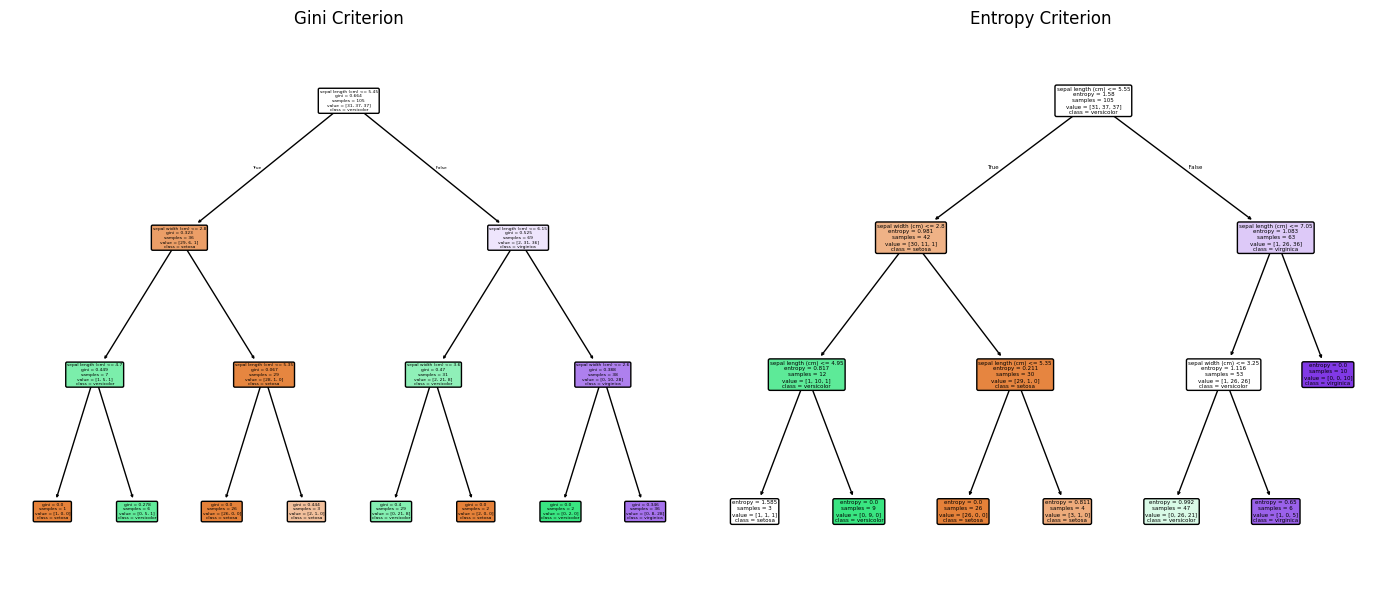


6. Feature Importance
   Gini Importance:
     sepal length (cm): 0.723
     sepal width (cm): 0.277

   Entropy Importance:
     sepal length (cm): 0.686
     sepal width (cm): 0.314

7. Test Pruning (max_depth)
   Depth | Gini Acc | Entropy Acc
   ------------------------------
       1 |    0.644 |      0.667
       2 |    0.756 |      0.711
       3 |    0.756 |      0.667
       4 |    0.756 |      0.800
       5 |    0.756 |      0.756


In [18]:
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 5. Visualize Trees
print("\n5. Visualize Trees")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gini tree
plot_tree(
    dt_gini,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
    rounded=True,
    ax=ax1
)
ax1.set_title("Gini Criterion")


plot_tree(
    dt_entropy,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
    rounded=True,
    ax=ax2
)
ax2.set_title("Entropy Criterion")

plt.tight_layout()
plt.savefig("simple_trees.png", dpi=100, bbox_inches="tight")
plt.show()


print("\n6. Feature Importance")

print("   Gini Importance:")
for name, imp in zip(feature_names, dt_gini.feature_importances_):
    print(f"     {name}: {imp:.3f}")

print("\n   Entropy Importance:")
for name, imp in zip(feature_names, dt_entropy.feature_importances_):
    print(f"     {name}: {imp:.3f}")


print("\n7. Test Pruning (max_depth)")
depths = [1, 2, 3, 4, 5]

print("   Depth | Gini Acc | Entropy Acc")
print("   " + "-" * 30)

for depth in depths:

    dt_g = DecisionTreeClassifier(criterion="gini", max_depth=depth, random_state=42)
    dt_g.fit(X_train, y_train)
    acc_g = accuracy_score(y_test, dt_g.predict(X_test))


    dt_e = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=42)
    dt_e.fit(X_train, y_train)
    acc_e = accuracy_score(y_test, dt_e.predict(X_test))

    print(f"   {depth:5d} | {acc_g:8.3f} | {acc_e:10.3f}")
